# Логика

Задача 1. Есть игровой автомат. При нажатии на кнопку он показывает игроку случайное число из
равномерного распределения на интервале [0, 1].
Какое число показал автомат – столько миллионов рублей выигрывает игрок.
У игрока есть два возможных действия: он может забрать деньги сразу после первого нажатия
кнопки, видя результат, или же сыграть еще раз и забрать деньги после второй попытки.

Вопрос:
 Какая стратегия гарантирует игроку максимальный выигрыш?
 Найти мат. ожидание выигрыша этой стратегии.

**Ответ**

Для того чтобы найти стратегию, которая гарантирует игроку максимальный выигрыш, давайте рассмотрим два возможных сценария:

Игрок решает забрать деньги сразу после первого нажатия кнопки.

Игрок решает продолжить игру и нажать кнопку второй раз.

Сценарий 1: Забрать деньги после первого нажатия кнопки.
В этом случае, ожидаемый выигрыш будет равен мат. ожиданию случайного числа, которое показал автомат из равномерного распределения на интервале [0, 1]. Мат. ожидание такого распределения равно 0.5.

Сценарий 2: Продолжить игру и нажать кнопку второй раз.
Если игрок решает продолжить игру, то он должен сравнить результат второго нажатия кнопки с результатом первого. Из-за того, что оба результаты независимы и равномерно распределены на интервале [0, 1], вероятность выиграть больше во второй раз также равна 0.5

Оба сценария дают одинаковое мат.ожидание.

**Задача 2**. Алиса и Боб играют в игру: Алиса записывает число (1 или 0), а Боб пытается назвать записанное
число. Из 15 попыток он 14 раз назвал число правильно.

Вопрос: Проверить гипотезу H0, что Боб выбирает число случайно.

**Ответ**

Для проверки гипотезы H0 о том, что Боб выбирает число случайно, мы можем использовать статистический тест. В данном случае, можно применить биномиальный тест.


Гипотеза H0: Боб выбирает число случайно, то есть вероятность угадать правильное число в каждой попытке равна 0.5.

Альтернативная гипотеза H1: Боб выбирает число НЕ случайно, то есть вероятность угадать правильное число в каждой попытке не равна 0.5, в нашем случае больше.

In [58]:
from scipy.stats import binom_test

In [62]:
# кол-во угаданных попыток
k_successes = 14
# кол-во попыток
n_trials = 15
# мат. ожидание
p_null_hypothesis = 0.5

p_value = binom_test(k_successes, n_trials, p_null_hypothesis)

# Выводим p-значение
p_value

<ipython-input-62-ed6fb7283ca2>:8: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = binom_test(k_successes, n_trials, p_null_hypothesis)


0.0009765625

По результатам биномиального теста p-value равно 0.0009765625, что значительно меньше уровня значимости 0.05.
Это означает, что мы можем отклонить нулевую гипотезу H0, в пользу H1.

Боб выбирает число не случайно)

# SQL

Задание 1

1. Какой запрос вернет самое большое число? Почему?
Для справки: (A right join B) эквивалентно (B left join A).

A.
select count(distinct first.counter_column)
from first
left join second on first.join_key = second.join_key
where second.filter_column >= 42;

B.
select count(distinct first.counter_column)
from first
left join second on first.join_key = second.join_key and second.filter_column >= 42;

C.
select count(distinct first.counter_column)
from first
right join second on first.join_key = second.join_key
where second.filter_column >= 42;


D.
select count(distinct first.counter_column)
from first
right join second on first.join_key = second.join_key and second.filter_column >= 42;

Ответ: Б

Почему?

Запрос B вернет самое большое число, так как он фильтрует данные на этапе соединения, оставляя только необходимые строки для подсчета.

Запрос A вернет меньшее число по сравнению с B, так как он фильтрует данные после соединения, включая больше строк в результат.

Запрос C вернет большее число по сравнению с D, так как он использует right join, который включает все строки из second, даже если условие не выполняется.

Следовательно, самое большое число будет в запросе B

**Задание 2 **
Задача:
1. Найти среднее время между первым и вторым заказом у пользователей. В запросе запрещается
использование JOIN’ов. Тестовые заказы фильтровать не нужно.

In [ ]:
1.
"""

WITH t AS (
  SELECT
    co.ClientID,
    co.Date AS FirstOrder,
    LEAD(co.Date) OVER (PARTITION BY co.ClientID ORDER BY co.Date) AS SecondOrder
  FROM
    ClientOrder co)

SELECT
  ClientID,
  AVG(EXTRACT(EPOCH FROM (SecondOrder - FirstOrder))) AS AVG_orders
FROM
  t
GROUP BY
  ClientID
HAVING
  COUNT(*) >= 2

"""

2. Для каждой пары платформы и категории товара найти топ-3 пользователей, у которых
наименьшее количество дней между первым и последним не тестовым заказом товаров из этой
категории.

In [ ]:
2.
"""

WITH Orders AS (
  SELECT
    co.ClientID,
    oi.categoryLvl1,
    MIN(co.Date) AS FirstOrderDate,
    MAX(co.Date) AS LastOrderDate
  FROM
    ClientOrder co
    JOIN ClientOrderItems oi ON co.ID = oi.ClientOrderID
    JOIN ClientOrderAdditionalInfo ai ON co.ID = ai.ClientOrderID
  WHERE
    ai.code = 'OrderType'
    AND ai.value != 'test'
    AND co.ClientOrderStateID IN (1, 2)
  GROUP BY
    co.ClientID, oi.categoryLvl1
)

SELECT
  n.ClientID,
  n.categoryLvl1,
  DATEDIFF('day', n.FirstOrderDate, n.LastOrderDate) AS DayDiff
FROM (
  SELECT
    ClientID,
    categoryLvl1,
    ROW_NUMBER() OVER (PARTITION BY categoryLvl1 ORDER BY DATEDIFF('day', FirstOrderDate, LastOrderDate)) AS rn
  FROM
    Orders
) n
WHERE
  n.rn <= 3;

"""

# Python

Для выполнения этого задания требуется сгенерировать DataFrame с синтетическими данными.
DataFrame должен состоять из 10000 строк и 5 колонок.
Каждую из колонок мы предлагаем тебе создать и наполнить следующим образом:

1-я колонка – user_id – идентификатор пользователя. Длина user_id должна равняться 15-ти
символам. Идентификатор состоит из случайной комбинации следующих символов:
"1234567890abcdefghijk". Для каждой строки в DataFrame значение user_id формируются
случайным образом.

2-я колонка – order_number – номер заказа. Столбец необходимо заполнить случайными
значениями в диапазоне от 1 до 10.

3-я колонка – click2delivery – время, прошедшее с момента оформления заказа до вручения
клиенту. Столбец необходимо заполнить случайными значениями из нормального распределения
со средним 1440 и стандартным отклонением 200.

4-я колонка – order_items_sum – общая стоимость заказа. Значения для этого столбца необходимо
взять из экспоненциального распределения с параметром λ = 1, смещённого на +1.

5-я колонка – retention – день жизни покупателя, в который он совершил заказ. Необходимо
сгенерировать значения 1, 2, 3, 4, 5 с вероятностями 0.35, 0.25, 0.2, 0.15 и 0.05 соответственно.
В случае, если в колонке user_id встречаются дублирующиеся значения, оставь только первое из
них.

Задача:
Для всех строк исходного датасета, сгруппированных по номеру заказа, посчитать среднее значение
времени доставки по группе. Результат необходимо добавить в новый столбец датафрейма.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def generate_user_id(length=15):
    characters = "1234567890abcdefghijk"
    return ''.join(np.random.choice(list(characters), length))


data = {
    'user_id': [generate_user_id() for _ in range(1000)],
    'order_number': np.random.randint(1, 11, size=1000),
    'click2delivery': np.random.normal(1440, 200, size=1000),
    'order_items_sum': np.random.exponential(scale=1, size=1000) + 1,
    'retention': np.random.choice([1, 2, 3, 4, 5], p=[0.35, 0.25, 0.2, 0.15, 0.05], size=1000)
}

df = pd.DataFrame(data)

In [24]:
# Удаление дубликатов
df.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

# Сброс индексов
df.reset_index(drop=True, inplace=True)

In [25]:
df.head(10)

,user_id,order_number,click2delivery,order_items_sum,retention
0,4612h53h1icag2f,7,1300.521226,2.996933,1
1,a916db03efchikj,5,1438.398615,1.542601,3
2,ifigkg112k1kfa6,7,1073.525141,1.129318,3
3,jb364ke29hbg7c5,1,1594.329679,1.505329,1
4,7fh747k2h5ci5a7,10,1374.561378,1.121351,4
5,0ahh6bcbjchkabh,3,1563.799787,2.286464,1
6,bj09hh6fge4j8b0,2,1480.663163,1.076062,2
7,1d9ih8d65041520,5,1646.904550,1.486994,3
8,bdfchgj7gffb7ki,2,1551.650815,1.495336,2
9,f558921k54973j4,4,1520.159043,1.007485,1


In [26]:
df['mean_time_delivery'] = df.groupby('order_number')['click2delivery'].transform('mean')

In [27]:
df.head()

,user_id,order_number,click2delivery,order_items_sum,retention,mean_time_delivery
0,4612h53h1icag2f,7,1300.521226,2.996933,1,1430.132366
1,a916db03efchikj,5,1438.398615,1.542601,3,1431.451233
2,ifigkg112k1kfa6,7,1073.525141,1.129318,3,1430.132366
3,jb364ke29hbg7c5,1,1594.329679,1.505329,1,1450.468266
4,7fh747k2h5ci5a7,10,1374.561378,1.121351,4,1412.782576


Отдельной колонкой добавить значения последовательности, начинающейся с 0,1, где каждый
следующий элемент является суммой двух предыдущих, умноженных на 0.5

In [28]:
list_seq = []


a, b = 0, 1

for _ in range(df.shape[0]):
    list_seq.append(a)
    a, b = b, (a + b) * 0.5

df['column_2'] = list_seq

In [29]:
df.head()

,user_id,order_number,click2delivery,order_items_sum,retention,mean_time_delivery,column_2
0,4612h53h1icag2f,7,1300.521226,2.996933,1,1430.132366,0.000
1,a916db03efchikj,5,1438.398615,1.542601,3,1431.451233,1.000
2,ifigkg112k1kfa6,7,1073.525141,1.129318,3,1430.132366,0.500
3,jb364ke29hbg7c5,1,1594.329679,1.505329,1,1450.468266,0.750
4,7fh747k2h5ci5a7,10,1374.561378,1.121351,4,1412.782576,0.625


Напиши функцию, которая принимает на вход значение user_id и возвращает строку следующего
вида: все буквы в той последовательности, в которой они встречаются в user_id, затем квадрат
числа, полученного из всех цифр в user_id в той последовательности, в которой они встречаются в
user_id.

In [30]:
def combine_user_id(user_id:str) -> str:

    letters = ''.join(filter(str.isalpha, user_id))
    digits = ''.join(filter(str.isdigit, user_id))

    squared_number = str(int(digits) ** 2)
    result =  letters + squared_number
    return result

In [31]:
user_id = "ab1cd1"
print(combine_user_id(user_id))

abcd121


Добавь результат применения этой функции к user_id в новый столбец. Использование циклов вне
функции запрещено.

In [32]:
df['new_user_id'] = df['user_id'].apply(combine_user_id)

In [33]:
df.head()

,user_id,order_number,click2delivery,order_items_sum,retention,mean_time_delivery,column_2,new_user_id
0,4612h53h1icag2f,7,1300.521226,2.996933,1,1430.132366,0.000,hhicagf2127544407097344
1,a916db03efchikj,5,1438.398615,1.542601,3,1431.451233,1.000,adbefchikj8391109609
2,ifigkg112k1kfa6,7,1073.525141,1.129318,3,1430.132366,0.500,ifigkgkkfa125798656
3,jb364ke29hbg7c5,1,1594.329679,1.505329,1,1450.468266,0.750,jbkehbgc13271266850625
4,7fh747k2h5ci5a7,10,1374.561378,1.121351,4,1412.782576,0.625,fhkhcia6001997088118249


Вычисли моду, медиану, среднее, дисперсию и стандартное отклонение для столбцов
click2delivery, order_items_sum и retention. Построй гистограммы распределения значений в
столбцах

In [35]:
df[['click2delivery', 'order_items_sum', 'retention']].describe()

,click2delivery,order_items_sum,retention
count,1000.000000,1000.000000,1000.000000
mean,1435.311162,1.978735,2.307000
std,198.769947,0.996676,1.236236
min,877.710075,1.000257,1.000000
25%,1300.564123,1.268757,1.000000
50%,1436.306360,1.680000,2.000000
75%,1578.239162,2.319830,3.000000
max,2195.754969,6.624741,5.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             1000 non-null   object 
 1   order_number        1000 non-null   int64  
 2   click2delivery      1000 non-null   float64
 3   order_items_sum     1000 non-null   float64
 4   retention           1000 non-null   int64  
 5   mean_time_delivery  1000 non-null   float64
 6   column_2            1000 non-null   float64
 7   new_user_id         1000 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 62.6+ KB


In [48]:
statistics = df[['click2delivery', 'order_items_sum', 'retention']].agg([lambda x: x.mode().values[0], 'median', 'mean', 'var', 'std']).transpose()
statistics.columns = ['Mode', 'Median', 'Mean', 'Variance', 'Std']

In [49]:
statistics

,Mode,Median,Mean,Variance,Std
click2delivery,877.710075,1436.30636,1435.311162,39509.491641,198.769947
order_items_sum,1.000257,1.68000,1.978735,0.993363,0.996676
retention,1.000000,2.00000,2.307000,1.528279,1.236236


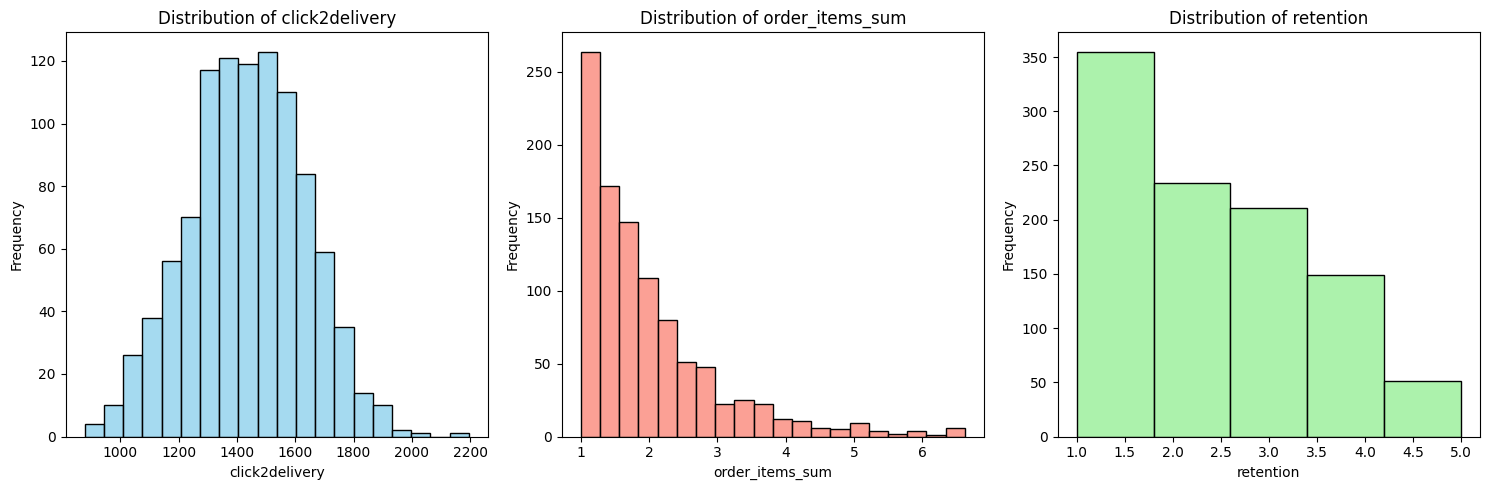

In [52]:
# click2delivery
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.histplot(df['click2delivery'], bins=20, color='skyblue')
plt.title('Distribution of click2delivery')
plt.xlabel('click2delivery')
plt.ylabel('Frequency')

# order_items_sum
plt.subplot(132)
sns.histplot(df['order_items_sum'], bins=20, color='salmon')
plt.title('Distribution of order_items_sum')
plt.xlabel('order_items_sum')
plt.ylabel('Frequency')

# retention
plt.subplot(133)
sns.histplot(df['retention'], bins=5, color='lightgreen')
plt.title('Distribution of retention')
plt.xlabel('retention')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Построй график, который наиболее полно, на твой взгляд, описывает зависимость времени доставки
заказа от его номера. Обоснуй, почему ты так считаешь?

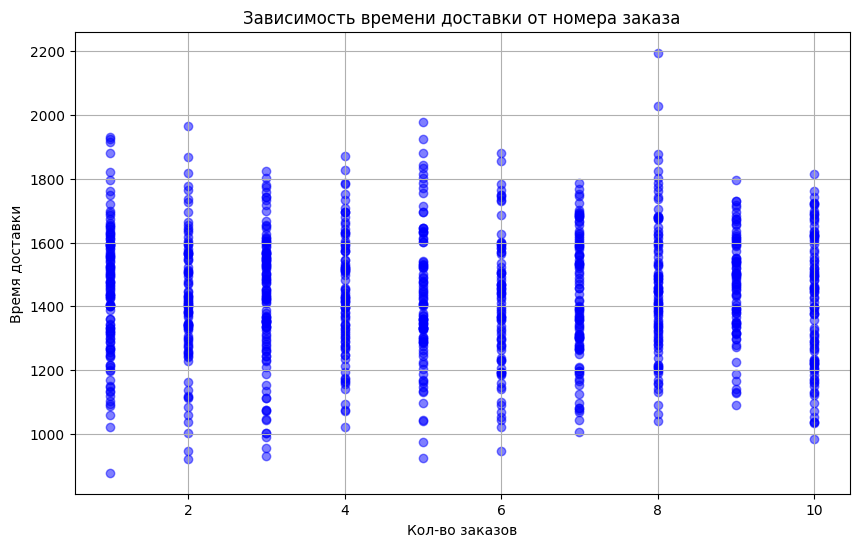

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(df['order_number'], df['click2delivery'], alpha=0.5, color='blue')
plt.title('Зависимость времени доставки от номера заказа')
plt.xlabel('Кол-во заказов')
plt.ylabel('Время доставки')
plt.grid(True)
plt.show()

На scatter  можно будет увидеть, как меняется время доставки заказов по мере увеличения их кол-ва. Если есть какие-либо закономерности, например, увеличение времени доставки с увеличением номера заказа, то они будут видны на графике.
По графику можно сделать предположение, что отсутсвует какая-либо корреляция X и Y.